# Aplication of Multi Dimensional LSTM

In [1]:
%reset
%matplotlib inline

import matplotlib.pyplot as plt

import sys
from time import time

import numpy as np
import tensorflow.contrib.slim as slim
from tensorflow.python.ops.rnn import dynamic_rnn

from data_gen import next_batch
from md_lstm import *


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Set varables

In [2]:
# LTSM cells to use
TYPE = 'MD_LSTM'
# Number of (MD-) LSTM units to use
hidden_size = 4

# Total number of steps to train on
steps = 100000
# Show error N steps
show_error_iter = 1000
# Show test image every N steps
show_img_iter = 10000

# Size of the training batch
batch_size = 16

# ADAM learning rate
learning_rate = 0.001 * 0.5

# Input image (generated random field) dimensions
h = 32
w = 32
# Number of chanels of the image (only one, module of the field)
channels = 1

## Build Network Graph

In [3]:

# Check analysis type
if TYPE == 'MD_LSTM':
    use_multi_dimensional_lstm = True
elif TYPE == 'LSTM':
    use_multi_dimensional_lstm = False
else:
    error('Unknown analysis type')
    
    
    


# Build network

# Input placeholder
x = tf.placeholder(tf.float32, [None, h, w, channels])
# Output placeholder
y = tf.placeholder(tf.float32, [None, h, w, channels])



# Create chosen LSTM layer type
if use_multi_dimensional_lstm:
    print('Using Multi Dimensional LSTM !')
    rnn_out, _ = multi_dimensional_rnn_while_loop(rnn_size=hidden_size, input_data=x, sh=[1, 1])
else:
    print('Using Standard LSTM !')
    rnn_out = standard_lstm(input_data=x, rnn_size=hidden_size)


# The output of the (MD_)LTSM layer is connected to a fully connected layer to generate output predction    
model_out = slim.fully_connected(inputs=rnn_out,
                                 num_outputs=1,
                                 activation_fn=None)

# Using the model output we construct the loss function to be optimized 
loss = 1e4 * tf.reduce_mean(tf.abs(tf.subtract(y, model_out)))

# Finally we attach an optimizer
grad_update = tf.train.AdamOptimizer(learning_rate).minimize(loss)




Using Multi Dimensional LSTM !


In [4]:
# Start Session and initialize graph
sess = tf.Session(config=tf.ConfigProto(log_device_placement=False))
sess.run(tf.global_variables_initializer())

# Add tensorboard (Really usefull)
train_writer = tf.summary.FileWriter('Tensorboard_out' + '/MDLSTM',sess.graph)

## Train!

steps = 000 | loss = 8715.301 | time 3.384


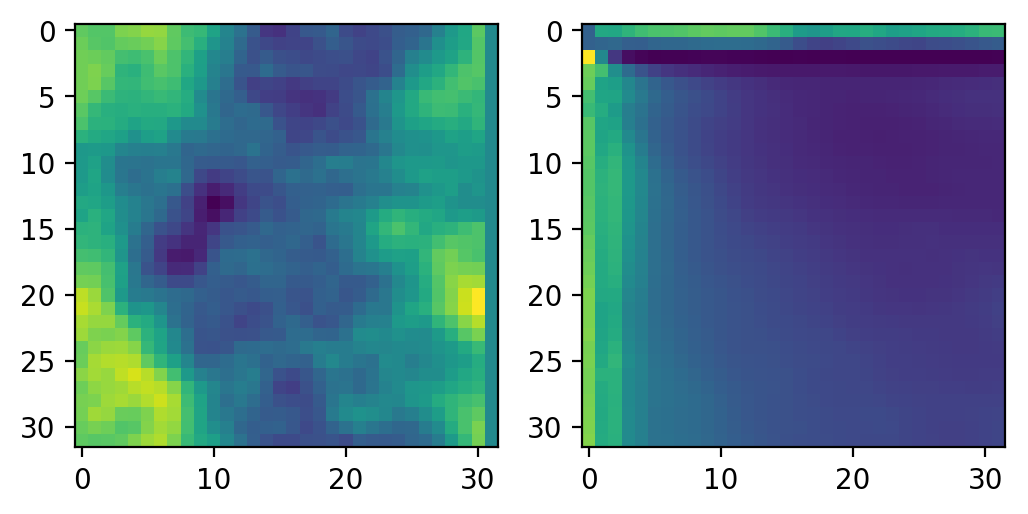

steps = 1000 | loss = 951.276 | time 1.083
steps = 2000 | loss = 650.888 | time 1.066
steps = 3000 | loss = 524.367 | time 1.040
steps = 4000 | loss = 506.820 | time 1.029
steps = 5000 | loss = 509.525 | time 1.060
steps = 6000 | loss = 476.272 | time 1.048
steps = 7000 | loss = 371.745 | time 1.032
steps = 8000 | loss = 269.103 | time 1.031
steps = 9000 | loss = 293.208 | time 1.078
steps = 10000 | loss = 341.213 | time 1.022


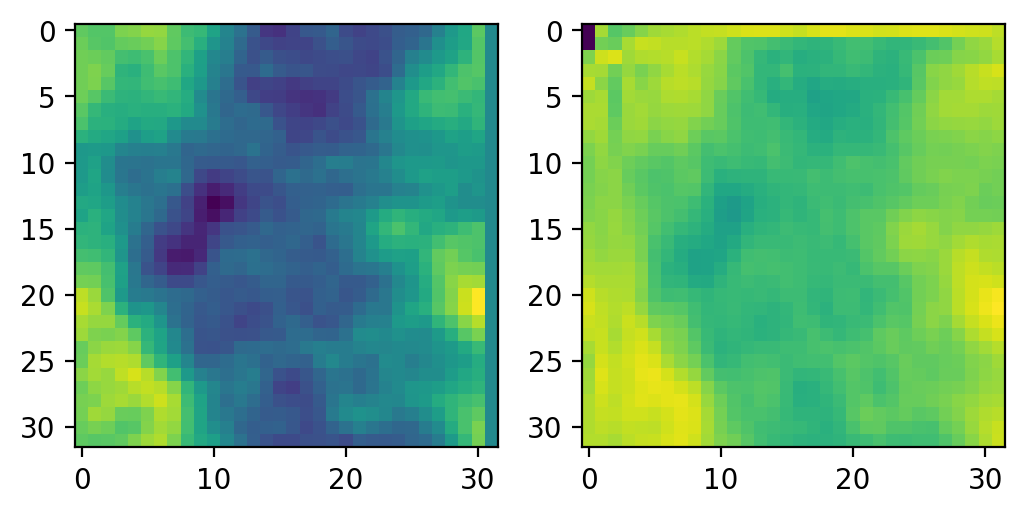

steps = 11000 | loss = 247.470 | time 1.065
steps = 12000 | loss = 283.844 | time 1.031
steps = 13000 | loss = 269.268 | time 1.024
steps = 14000 | loss = 249.194 | time 1.045
steps = 15000 | loss = 216.143 | time 1.050
steps = 16000 | loss = 237.529 | time 1.026
steps = 17000 | loss = 399.623 | time 1.031
steps = 18000 | loss = 435.889 | time 1.076
steps = 19000 | loss = 335.151 | time 1.025
steps = 20000 | loss = 301.941 | time 1.024


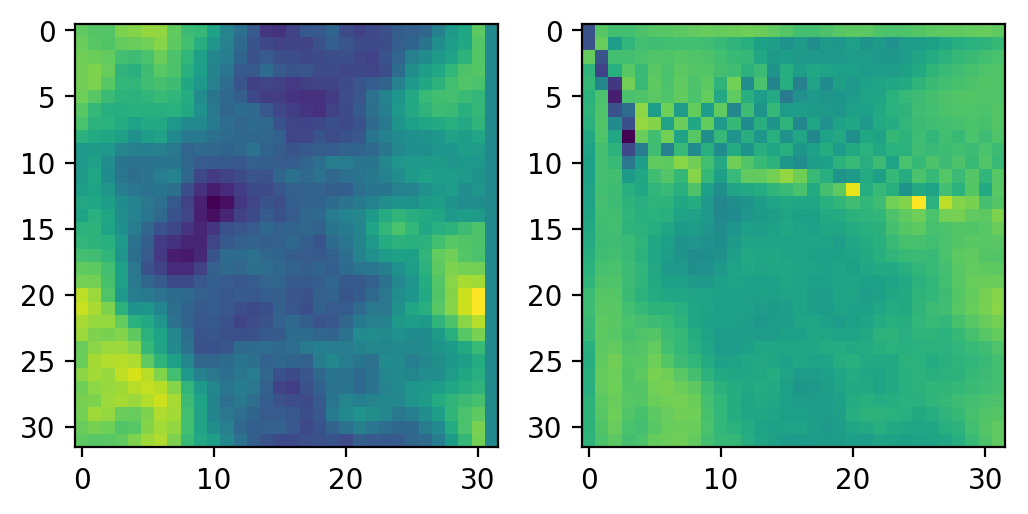

steps = 21000 | loss = 319.192 | time 1.062
steps = 22000 | loss = 318.195 | time 1.023
steps = 23000 | loss = 308.684 | time 1.048
steps = 24000 | loss = 310.307 | time 1.077
steps = 25000 | loss = 297.116 | time 1.033
steps = 26000 | loss = 298.447 | time 1.039
steps = 27000 | loss = 289.856 | time 1.025
steps = 28000 | loss = 289.438 | time 1.040
steps = 29000 | loss = 265.351 | time 1.050
steps = 30000 | loss = 254.987 | time 1.057


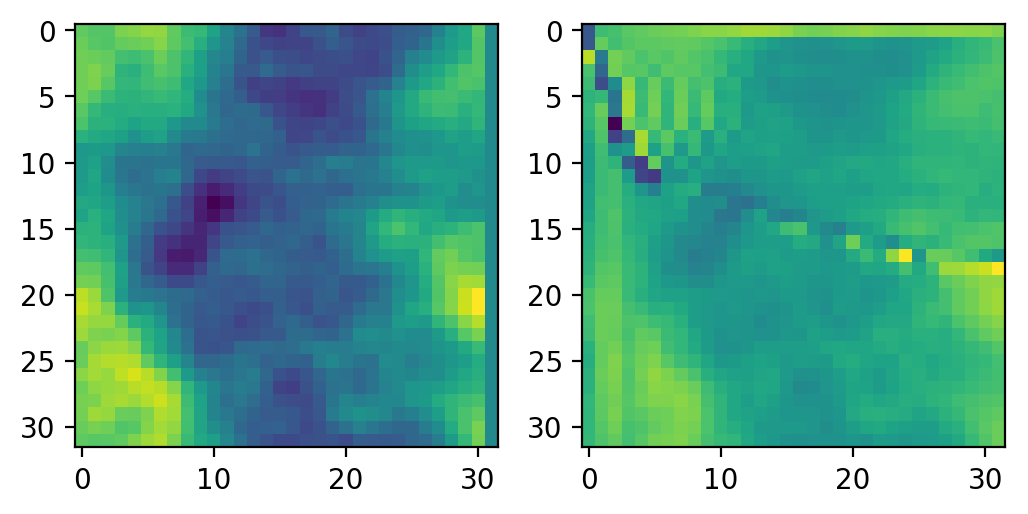

steps = 31000 | loss = 232.396 | time 1.027
steps = 32000 | loss = 223.411 | time 1.021
steps = 33000 | loss = 214.167 | time 1.032
steps = 34000 | loss = 217.837 | time 1.060
steps = 35000 | loss = 176.599 | time 1.022
steps = 36000 | loss = 195.256 | time 1.046
steps = 37000 | loss = 183.314 | time 1.067
steps = 38000 | loss = 184.964 | time 1.042
steps = 39000 | loss = 178.755 | time 1.058
steps = 40000 | loss = 180.745 | time 1.066


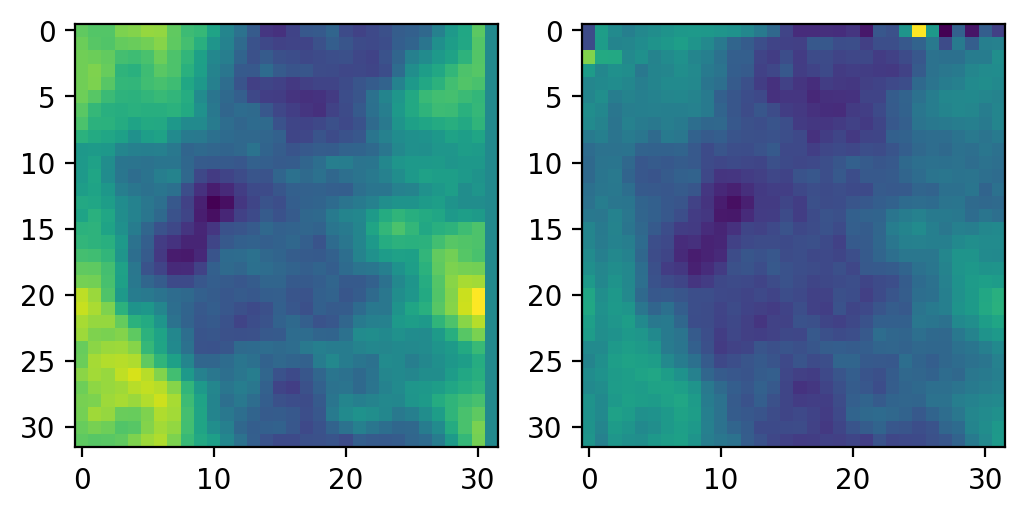

steps = 41000 | loss = 189.909 | time 1.071
steps = 42000 | loss = 177.679 | time 1.034
steps = 43000 | loss = 181.121 | time 1.080
steps = 44000 | loss = 187.401 | time 1.027
steps = 45000 | loss = 177.378 | time 1.024
steps = 46000 | loss = 164.339 | time 1.044
steps = 47000 | loss = 170.166 | time 1.053
steps = 48000 | loss = 150.118 | time 1.029
steps = 49000 | loss = 153.148 | time 1.054
steps = 50000 | loss = 157.857 | time 1.091


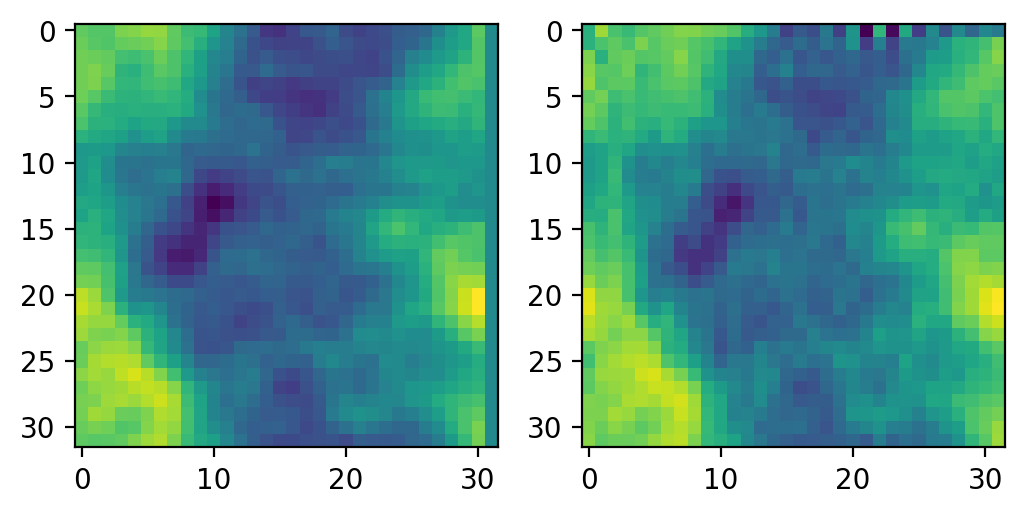

steps = 51000 | loss = 150.777 | time 1.033
steps = 52000 | loss = 139.633 | time 1.036
steps = 53000 | loss = 133.205 | time 1.022
steps = 54000 | loss = 140.805 | time 1.024
steps = 55000 | loss = 131.522 | time 1.033
steps = 56000 | loss = 138.879 | time 1.071
steps = 57000 | loss = 132.119 | time 1.030
steps = 58000 | loss = 133.363 | time 1.044
steps = 59000 | loss = 134.047 | time 1.022
steps = 60000 | loss = 127.285 | time 1.029


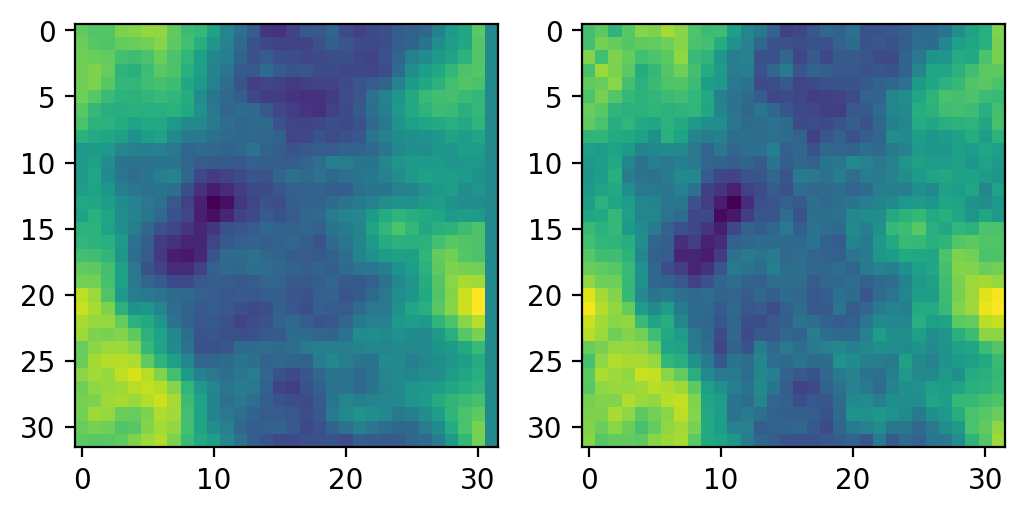

steps = 61000 | loss = 134.032 | time 1.029
steps = 62000 | loss = 137.206 | time 1.635
steps = 63000 | loss = 130.330 | time 1.625
steps = 64000 | loss = 134.150 | time 1.449
steps = 65000 | loss = 128.933 | time 1.524
steps = 66000 | loss = 138.345 | time 1.233
steps = 67000 | loss = 135.909 | time 1.255
steps = 68000 | loss = 124.980 | time 1.198
steps = 69000 | loss = 127.541 | time 1.168
steps = 70000 | loss = 127.415 | time 1.053


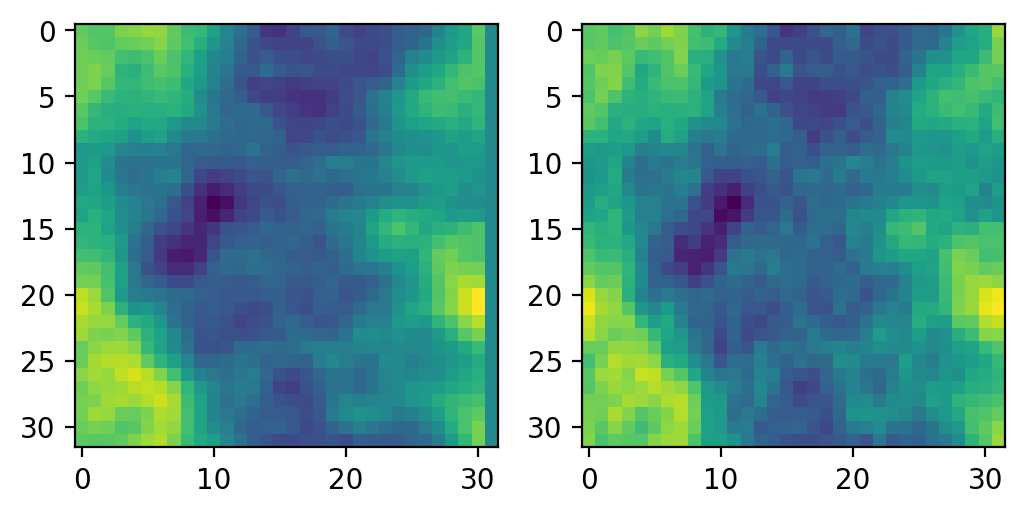

steps = 71000 | loss = 128.872 | time 1.082
steps = 72000 | loss = 123.234 | time 1.064
steps = 73000 | loss = 128.372 | time 1.035
steps = 74000 | loss = 130.793 | time 1.046
steps = 75000 | loss = 125.618 | time 1.095
steps = 76000 | loss = 131.443 | time 1.099
steps = 77000 | loss = 125.501 | time 1.068
steps = 78000 | loss = 125.095 | time 1.051
steps = 79000 | loss = 133.006 | time 1.048
steps = 80000 | loss = 132.862 | time 1.033


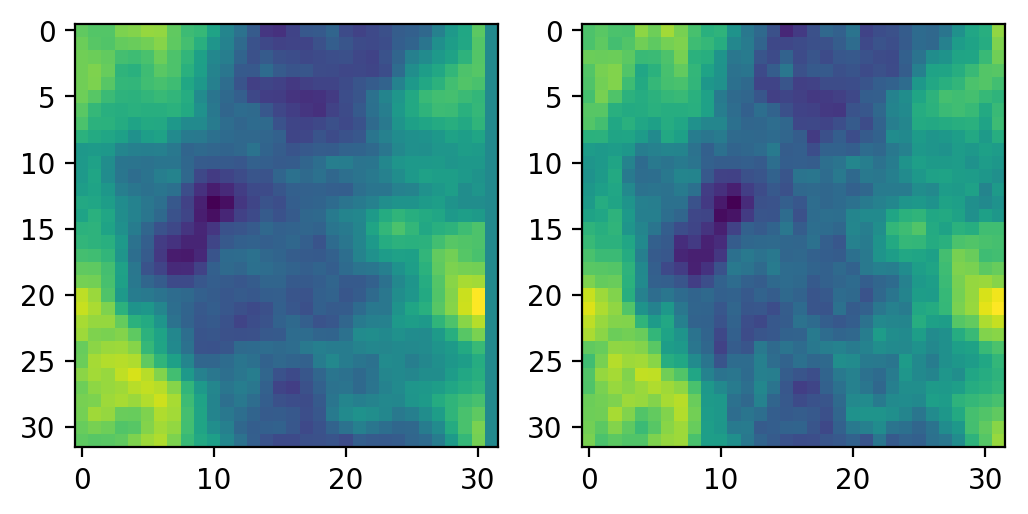

steps = 81000 | loss = 126.861 | time 1.021
steps = 82000 | loss = 129.944 | time 1.077
steps = 83000 | loss = 129.841 | time 1.061
steps = 84000 | loss = 124.443 | time 1.085
steps = 85000 | loss = 129.226 | time 1.060
steps = 86000 | loss = 132.687 | time 1.036
steps = 87000 | loss = 128.093 | time 1.049
steps = 88000 | loss = 126.988 | time 1.033
steps = 89000 | loss = 125.178 | time 1.173
steps = 90000 | loss = 128.503 | time 1.034


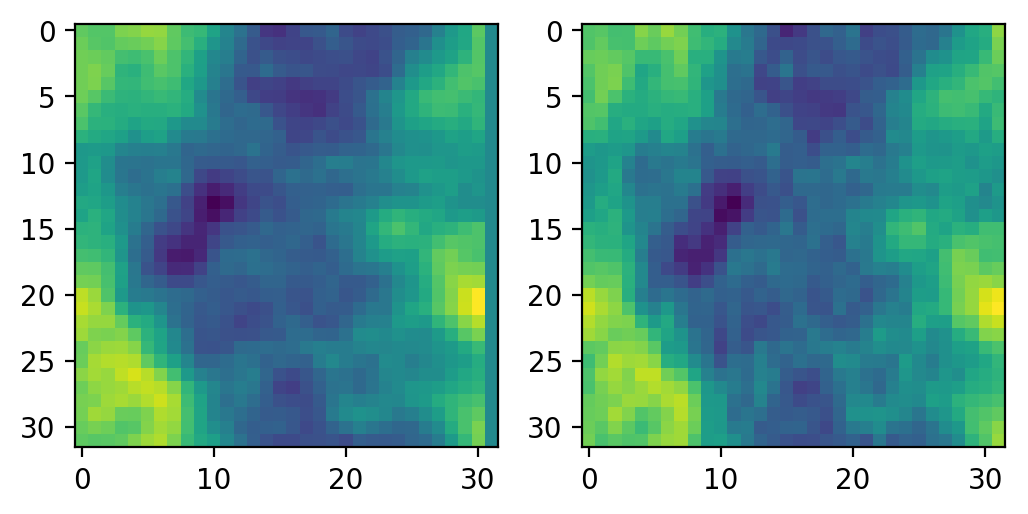

steps = 91000 | loss = 126.753 | time 1.052
steps = 92000 | loss = 129.270 | time 1.047
steps = 93000 | loss = 129.305 | time 1.077
steps = 94000 | loss = 122.897 | time 1.039
steps = 95000 | loss = 122.366 | time 1.094
steps = 96000 | loss = 124.368 | time 1.041
steps = 97000 | loss = 126.335 | time 1.041
steps = 98000 | loss = 133.620 | time 1.036
steps = 99000 | loss = 127.179 | time 1.049
steps = 100000 | loss = 128.082 | time 1.078


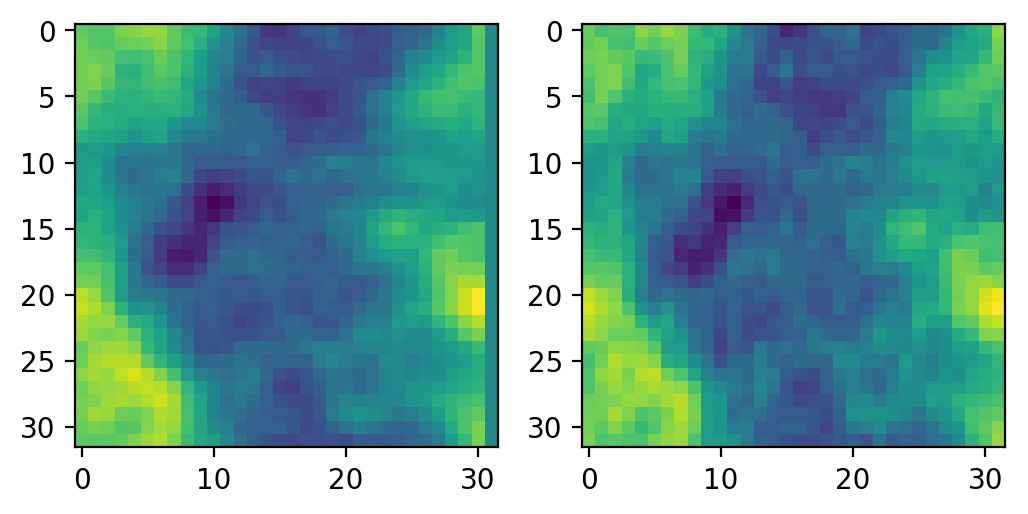

In [5]:
# Generate test sample to show improvements (a batch of 1 sample)
batch = next_batch(1, h, w, anisotropy = False)
# Expand to generate the channels dimension
test_x = np.expand_dims(batch[0], axis=3)
test_y = np.expand_dims(batch[1], axis=3)

# Train
for i in range(steps+1):
    
    # Generate gaussian random field as imput data
    batch = next_batch(batch_size, h, w, anisotropy = False)
    
    # Get current time (to measure train step time)
    st = time()
    
    # Expand to generate the channels dimension
    batch_x = np.expand_dims(batch[0], axis=3)
    batch_y = np.expand_dims(batch[1], axis=3)

    # If the LTMS is not Multi Dimensional we shuffle the width
    if not use_multi_dimensional_lstm and i == 0:
        print('Shuffling the batch in the height dimension for the standard LSTM.'
              'Its like having h LSTM on the width axis.')
        perms = np.random.permutation(list(range(w)))
        batch_x = batch_x[:, perms, :, :]
        batch_y = batch_y[:, perms, :, :]
        pass

    # Train the network and the loss value
    loss_val, _ = sess.run([loss, grad_update], feed_dict={x: batch_x, y: batch_y})
    
    # Print step information if is the chosen step
    if i%show_error_iter == 0:
        print('steps = {0} | loss = {1:.3f} | time {2:.3f}'.format(str(i).zfill(3),
                                                               loss_val,
                                                               time() - st))
    # Plot example if is the chosen step
    if i%show_img_iter == 0:
        # Test current Network
        prediction_data = sess.run([model_out], feed_dict={x: test_x})
        prediction_data_np = np.array(prediction_data)
        
        # Plot
        fig = plt.figure(dpi=200)
        ax = plt.subplot(121)
        ax.imshow(test_y[0,:,:,0])
        ax = plt.subplot(122)
        ax.imshow(prediction_data_np[0,0,:,:,0])
        plt.show()
    
    
    